<H1> Нечеткая логика </H1>

# импорт

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.metrics import accuracy_score

# Нечеткие множества

Опишем триангулярные термы, которые расположен равномерно на инервале $[x_{min}, x_{max}]$.

$[x_{min}, x_{max}]$ можно предварительно масштабировть в $[0, 1]$ чтобы использовать абстрактные имена.


Закодируем термы следующим образом (реальные названия можно потом вывести на экран):
 * Для 3х термов: -1, 0, +1 (отрицательный, нулевой, положительный)
 * Для 5и термов: -2, -1, 0, 1, 2 (большой отричательный, отрицательный, нулевой, положительный, большой положительный).
 * и т.д.

In [ ]:
def membershipFunction(x, xMin, xMax, term=0, numOfTerms=3):
    delta=(xMax-xMin)/(numOfTerms-1)
    if numOfTerms==3:
        k=term+1
    elif numOfTerms==5:
        k=term+2
    else:
        k=term+3
    m=xMin+delta*k
    a=m-delta
    b=m+delta

    # крайние левые
    if ((numOfTerms==3 and term==-1) or (numOfTerms==5 and term==-2) or
        (numOfTerms==7 and term==-3)):
        if x<=m:
            rez=1
        elif x>m and x<b:
            rez=(b-x)/(b-m)
        else:
            rez=0

    # крайние правые
    elif ((numOfTerms==3 and term==1) or (numOfTerms==5 and term==2) or
        (numOfTerms==7 and term==3)):
        if x>=m:
            rez=1
        elif x<m and x>a:
            rez=(x-a)/(m-a)
        else:
            rez=0

    # треугольный
    else:
        if x<=a or x>=b:
            rez=0
        elif x>a and x<=m:
            rez=(x-a)/(m-a)
        else:
            rez=(b-x)/(b-m)

    return rez

In [ ]:
# пример
membershipFunction(-2, -3, 7, term=0, numOfTerms=3)

0.2

Пусть $x \in [-3,7]$ и число термов - 3. Вычислим принадлежности для всех точек интервала и нарисуем на графике.

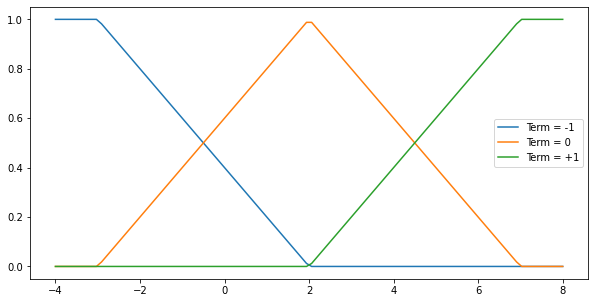

In [ ]:
sample_volume = 100
x = np.linspace(-4, 8, sample_volume)
mu1 = np.zeros(sample_volume)
mu2 = np.zeros(sample_volume)
mu3 = np.zeros(sample_volume)

for i in range(sample_volume):
  mu1[i] = membershipFunction(x[i], -3, 7, term=-1, numOfTerms=3)
  mu2[i] = membershipFunction(x[i], -3, 7, term=0, numOfTerms=3)
  mu3[i] = membershipFunction(x[i], -3, 7, term=1, numOfTerms=3)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x,mu1, label='Term = -1')
ax.plot(x,mu2, label='Term = 0')
ax.plot(x,mu3, label='Term = +1')
ax.legend()
plt.show()

Сделать график для 5 и для 7 термов (2 разных графика)

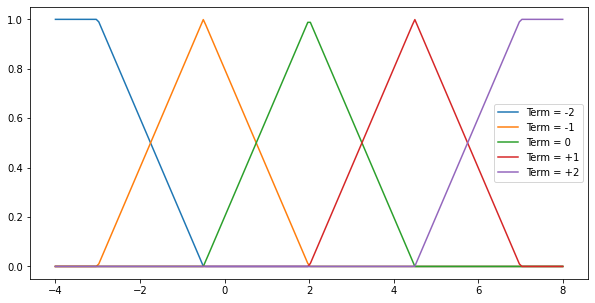

In [ ]:
sample_volume = 200
x = np.linspace(-4, 8, sample_volume)
mu1 = np.zeros(sample_volume)
mu2 = np.zeros(sample_volume)
mu3 = np.zeros(sample_volume)
mu4 = np.zeros(sample_volume)
mu5 = np.zeros(sample_volume)

for i in range(sample_volume):
  mu1[i] = membershipFunction(x[i], -3, 7, term=-2, numOfTerms=5)
  mu2[i] = membershipFunction(x[i], -3, 7, term=-1, numOfTerms=5)
  mu3[i] = membershipFunction(x[i], -3, 7, term=0, numOfTerms=5)
  mu4[i] = membershipFunction(x[i], -3, 7, term=1, numOfTerms=5)
  mu5[i] = membershipFunction(x[i], -3, 7, term=2, numOfTerms=5)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x,mu1, label='Term = -2')
ax.plot(x,mu2, label='Term = -1')
ax.plot(x,mu3, label='Term = 0')
ax.plot(x,mu4, label='Term = +1')
ax.plot(x,mu5, label='Term = +2')
ax.legend()
plt.show()

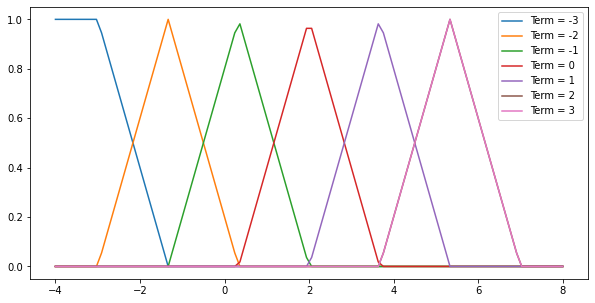

In [ ]:
sample_volume = 100
x = np.linspace(-4, 8, sample_volume)
mu1 = np.zeros(sample_volume)
mu2 = np.zeros(sample_volume)
mu3 = np.zeros(sample_volume)
mu4 = np.zeros(sample_volume)
mu5 = np.zeros(sample_volume)
mu6 = np.zeros(sample_volume)
mu7 = np.zeros(sample_volume)

for i in range(sample_volume):
  mu1[i] = membershipFunction(x[i], -3, 7, term=-3, numOfTerms=7)
  mu2[i] = membershipFunction(x[i], -3, 7, term=-2, numOfTerms=7)
  mu3[i] = membershipFunction(x[i], -3, 7, term=-1, numOfTerms=7)
  mu4[i] = membershipFunction(x[i], -3, 7, term=0, numOfTerms=7)
  mu5[i] = membershipFunction(x[i], -3, 7, term=1, numOfTerms=7)
  mu6[i] = membershipFunction(x[i], -3, 7, term=2, numOfTerms=7)
  mu7[i] = membershipFunction(x[i], -3, 7, term=2, numOfTerms=7)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x,mu1, label='Term = -3')
ax.plot(x,mu2, label='Term = -2')
ax.plot(x,mu3, label='Term = -1')
ax.plot(x,mu4, label='Term = 0')
ax.plot(x,mu5, label='Term = 1')
ax.plot(x,mu6, label='Term = 2')
ax.plot(x,mu7, label='Term = 3')
ax.legend()
plt.show()

<br>

Функция $\alpha$-срез (альфа-срез).

In [ ]:
def alphaCut(alpha, x, xMin, xMax, term=0, numOfTerms=3):
    mu = membershipFunction(x,xMin, xMax, term, numOfTerms)
    if mu>alpha:
        return alpha
    else:
        return mu

Пример. Применим срез на $\alpha=0.7$ для терма $+1$. Построим график итоговой функции принадлежности.

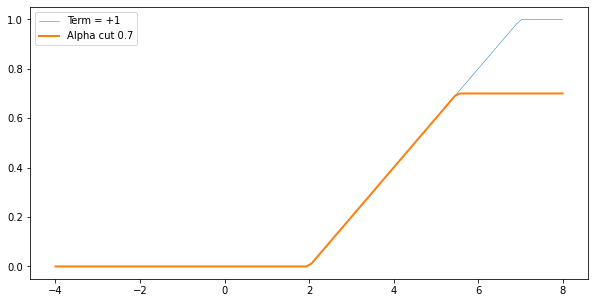

In [ ]:
sample_volume = 100
x = np.linspace(-4, 8, sample_volume)
mu_cut = np.zeros(sample_volume)

for i in range(sample_volume):
  mu_cut[i] = alphaCut(0.7, x[i], -3, 7, term=+1, numOfTerms=3)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x,mu3, lw=0.5, label='Term = +1')
ax.plot(x,mu_cut, lw=2, label='Alpha cut 0.7')
ax.legend()
plt.show()

Сделать для 5 термов срез отрицательного терма (-1) на уровне 0.35

<br>

In [ ]:
def alphaCut(alpha, x, xMin, xMax, term=0, numOfTerms=5):
    mu = membershipFunction(x,xMin, xMax, term, numOfTerms)
    if mu>alpha:
        return alpha
    else:
        return mu

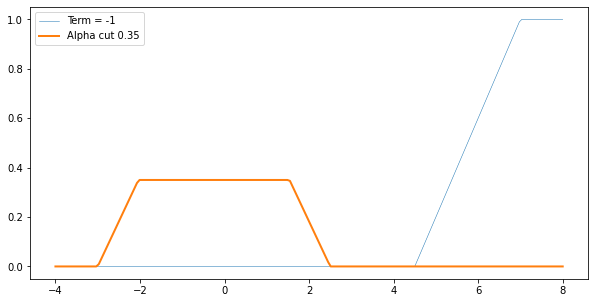

In [ ]:
sample_volume = 200
x = np.linspace(-4, 8, sample_volume)
mu_cut = np.zeros(sample_volume)

for i in range(sample_volume):
  mu_cut[i] = alphaCut(0.35, x[i], -3, 8, term=-1, numOfTerms=5)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x,mu5, lw=0.5, label='Term = -1')
ax.plot(x,mu_cut, lw=2, label='Alpha cut 0.35')
ax.legend()
plt.show()

# Cмоделируем простую задачу классификации

In [ ]:
sampleVolume=100
minX=0
maxX=10

attr1=np.random.uniform(minX,maxX,sampleVolume)
attr2=np.random.uniform(minX,maxX,sampleVolume)

data=pd.DataFrame( { 'attr1' : attr1, 'attr2' : attr2} )
data.head(3)

,attr1,attr2
0,9.731224,8.282859
1,2.331215,2.649855
2,0.865156,1.684939


In [ ]:
data['label'] = 0
for i in range(sampleVolume):
    x1=data.iloc[i].at['attr1']
    x2=data.iloc[i].at['attr2']
    if (x2-x1**2/12-1) >= 0:
      data.at[i, 'label'] = 1
    else:
      data.at[i, 'label'] = 0
data.head(3)

,attr1,attr2,label
0,9.731224,8.282859,0
1,2.331215,2.649855,1
2,0.865156,1.684939,1


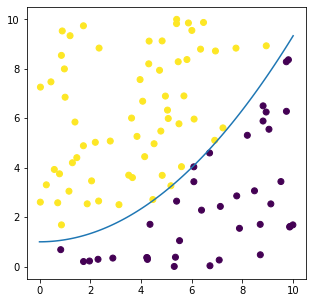

In [ ]:
xx = np.linspace(0, 10, 100)
yy = xx**2/12+1
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(data['attr1'], data['attr2'], c=data['label'])
ax.plot(xx,yy)
plt.show()

# Классификатор Ишибучи

## Обучение

Пример для 3х термов

Сформируем базу правил, чтобы далее перебирать термы в цикле

In [ ]:
# число переменных
n = 2
x_min = 0
x_max = 10
# число классов
class_counts = 2
# число термов
T = 3
# всего правил
rulebase_volume = T**n

# список термов для каждой переменной
terms = [[-1, 0, 1], [-1, 0, 1]]
# база правил
ruleBase = list(itertools.product(*terms))
ruleBase

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]

Назначим метки классов и уровень значимости $CF$ по правилу Ишибучи.

In [ ]:
rule_label = []
CF = []
class_volume = [ len(data[data['label']==0]), len(data[data['label']==1]) ]

# для каждого правила
for rule in ruleBase:
  beta_classes = []

  # для каждого класса
  for c in range(class_counts):
    sumMu = 0

    for s in range(sampleVolume):
      if data.at[s, 'label'] == c:
        xMu = []
        # уровень срабатывания по всем переменным
        for i in range(n):
          firing_level = membershipFunction(data.loc[s ].iat[i], x_min, x_max, term=rule[i], numOfTerms=3)
          xMu.append(firing_level)
        sumMu += np.min(xMu)
    beta_classes.append( sumMu / class_volume[c])

  rule_label.append(np.argmax(beta_classes))

  sum_beta_upper = (np.sum(beta_classes) - np.max(beta_classes)) / (class_counts - 1)
  if np.sum(beta_classes) == 0:
    CF.append(0)
  else:
    CF.append( (np.max(beta_classes) - sum_beta_upper) / np.sum(beta_classes) )

In [ ]:
# т.к. x в [0,10] переназвать лингвистические переменные
for i in range(rulebase_volume):

  if ruleBase[i][0] == -1:
    x1_label = "малый"
  elif ruleBase[i][0] == 0:
    x1_label = "средний"
  else:
    x1_label = "большой"

  if ruleBase[i][1] == -1:
    x2_label = "малый"
  elif ruleBase[i][1] == 0:
    x2_label = "средний"
  else:
    x2_label = "большой"

  print("IF x1 =", x1_label,"AND x2 =",x2_label,"THEN class =", rule_label[i], "with CF =", CF[i])

IF x1 = малый AND x2 = малый THEN class = 0 with CF = 0.033066170515538305
IF x1 = малый AND x2 = средний THEN class = 1 with CF = 0.8640398720821524
IF x1 = малый AND x2 = большой THEN class = 1 with CF = 1.0
IF x1 = средний AND x2 = малый THEN class = 0 with CF = 0.637633507237751
IF x1 = средний AND x2 = средний THEN class = 1 with CF = 0.2964839659245127
IF x1 = средний AND x2 = большой THEN class = 1 with CF = 0.8181288972667219
IF x1 = большой AND x2 = малый THEN class = 0 with CF = 0.9761046784033475
IF x1 = большой AND x2 = средний THEN class = 0 with CF = 0.7253059989918665
IF x1 = большой AND x2 = большой THEN class = 0 with CF = 0.04865033618046646


## Прогноз

In [ ]:
output = np.zeros(sampleVolume)

for s in range(sampleVolume):
  prodMuCF = []
  for rule in range(rulebase_volume):
    xMu = []
    # min firing level
    for i in range(n):
        xMu.append( membershipFunction(data.loc[s].iat[i], x_min, x_max, term=ruleBase[rule][i], numOfTerms=3) )
    muVal = np.min(xMu)
    prodMuCF.append( CF[rule]*muVal )
  output[s] = rule_label[np.argmax(prodMuCF)]

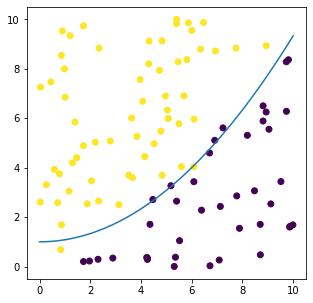

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(data['attr1'], data['attr2'], c=output)
ax.plot(xx,yy)
plt.show()

In [ ]:
accuracy_score(data['label'], output)

0.94

Обучение классификатора Ишибучи на базе с 5 термами. Сравние точность с базой на 3 терма.

In [ ]:
# число переменных
n = 2
x_min = 0
x_max = 10
# число классов
class_counts = 2
# число термов
T = 5
# всего правил
rulebase_volume = T**n

# список термов для каждой переменной
terms = [[-2,-1, 0, 1,2], [-2,-1, 0, 1,2]]
# база правил
ruleBase = list(itertools.product(*terms))
ruleBase

[(-2, -2),
 (-2, -1),
 (-2, 0),
 (-2, 1),
 (-2, 2),
 (-1, -2),
 (-1, -1),
 (-1, 0),
 (-1, 1),
 (-1, 2),
 (0, -2),
 (0, -1),
 (0, 0),
 (0, 1),
 (0, 2),
 (1, -2),
 (1, -1),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, -2),
 (2, -1),
 (2, 0),
 (2, 1),
 (2, 2)]

In [ ]:
rule_label = []
CF = []
class_volume = [ len(data[data['label']==0]), len(data[data['label']==1]) ]

# для каждого правила
for rule in ruleBase:
  beta_classes = []

  # для каждого класса
  for c in range(class_counts):
    sumMu = 0

    for s in range(sampleVolume):
      if data.at[s, 'label'] == c:
        xMu = []
        # уровень срабатывания по всем переменным
        for i in range(n):
          firing_level = membershipFunction(data.loc[s ].iat[i], x_min, x_max, term=rule[i], numOfTerms=5)
          xMu.append(firing_level)
        sumMu += np.min(xMu)
    beta_classes.append( sumMu / class_volume[c])

  rule_label.append(np.argmax(beta_classes))

  sum_beta_upper = (np.sum(beta_classes) - np.max(beta_classes)) / (class_counts - 1)
  if np.sum(beta_classes) == 0:
    CF.append(0)
  else:
    CF.append( (np.max(beta_classes) - sum_beta_upper) / np.sum(beta_classes) )

In [ ]:
rule_label

[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

In [ ]:
# т.к. x в [0,10] переназвать лингвистические переменные
for i in range(rulebase_volume):

  if ruleBase[i][0] == -2:
    x1_label = "малый"
  elif ruleBase[i][0] == -1:
    x1_label = "малый"
  elif ruleBase[i][0] == 0:
    x1_label = "средний"
  else:
    x1_label = "большой"

  if ruleBase[i][1] == -2:
    x1_label = "малый"
  if ruleBase[i][1] == -1:
    x2_label = "малый"
  elif ruleBase[i][1] == 0:
    x2_label = "средний"
  else:
    x2_label = "большой"

  print("IF x1 =", x1_label,"AND x2 =",x2_label,"THEN class =", rule_label[i], "with CF =", CF[i])

IF x1 = малый AND x2 = большой THEN class = 0 with CF = 0.7262462909324341
IF x1 = малый AND x2 = малый THEN class = 1 with CF = 0.7353612691541153
IF x1 = малый AND x2 = средний THEN class = 1 with CF = 1.0
IF x1 = малый AND x2 = большой THEN class = 1 with CF = 1.0
IF x1 = малый AND x2 = большой THEN class = 1 with CF = 1.0
IF x1 = малый AND x2 = большой THEN class = 0 with CF = 0.9185742448401049
IF x1 = малый AND x2 = малый THEN class = 1 with CF = 0.5188101594606552
IF x1 = малый AND x2 = средний THEN class = 1 with CF = 1.0
IF x1 = малый AND x2 = большой THEN class = 1 with CF = 1.0
IF x1 = малый AND x2 = большой THEN class = 1 with CF = 1.0
IF x1 = малый AND x2 = большой THEN class = 0 with CF = 1.0
IF x1 = средний AND x2 = малый THEN class = 0 with CF = 0.31944525393678
IF x1 = средний AND x2 = средний THEN class = 1 with CF = 0.621425050254176
IF x1 = средний AND x2 = большой THEN class = 1 with CF = 1.0
IF x1 = средний AND x2 = большой THEN class = 1 with CF = 1.0
IF x1 = мал

In [ ]:
output = np.zeros(sampleVolume)

for s in range(sampleVolume):
  prodMuCF = []
  for rule in range(rulebase_volume):
    xMu = []
    # min firing level
    for i in range(n):
        xMu.append( membershipFunction(data.loc[s].iat[i], x_min, x_max, term=ruleBase[rule][i], numOfTerms=5) )
    muVal = np.min(xMu)
    prodMuCF.append( CF[rule]*muVal )
  output[s] = rule_label[np.argmax(prodMuCF)]

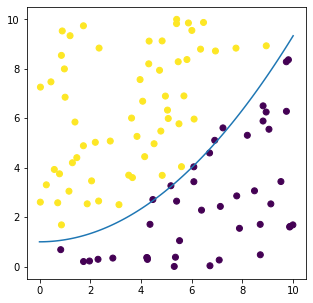

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(data['attr1'], data['attr2'], c=output)
ax.plot(xx,yy)
plt.show()

In [ ]:
accuracy_score(data['label'], output)

0.96